## valence and arousal for each song

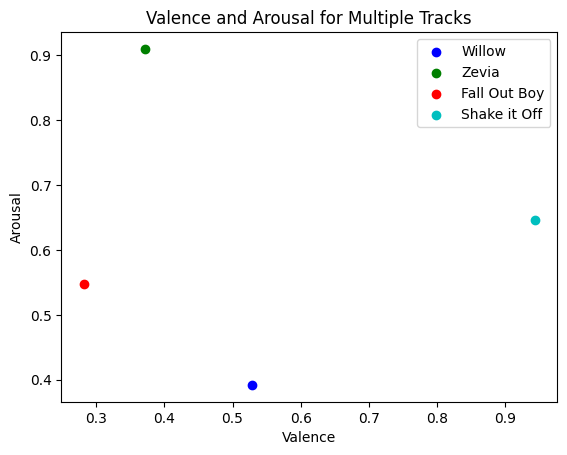

In [5]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import mplcursors
import numpy as np

# Set up Spotify API credentials
client_id = '8a9262cf15dd4e16bd72737b6e6a93ee'
client_secret = '1b7eb12115884c8eb165f3291eaa55c6'
redirect_uri = 'https://en.wikipedia.org/wiki/India'

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

def get_track_id(track_name):
    """Get the Spotify track ID for a given track name."""
    results = sp.search(q='track:' + track_name, type='track')
    return results['tracks']['items'][0]['id']

def get_track_features(track_id):
    """Get the valence and arousal (danceability) for a given track ID."""
    features = sp.audio_features([track_id])
    valence = features[0]['valence']
    arousal = features[0]['danceability']
    return valence, arousal

def plot_valence_arousal(track_names):
    """Plot the valence and arousal for a list of tracks."""
    fig, ax = plt.subplots()
    cursor = mplcursors.cursor(ax)
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Add more colors if you have more than 7 songs

    for i, track_name in enumerate(track_names):
        track_id = get_track_id(track_name)
        valence, arousal = get_track_features(track_id)
        scatter = ax.scatter([valence], [arousal], c=colors[i % len(colors)], label=track_name)

    ax.set_xlabel('Valence')
    ax.set_ylabel('Arousal')
    ax.set_title('Valence and Arousal for Multiple Tracks')
    ax.legend(loc='best')
    plt.show()

track_names = ['Willow', 'Zevia', 'Fall Out Boy', 'Shake it Off']  # Replace with your list of song names
plot_valence_arousal(track_names)


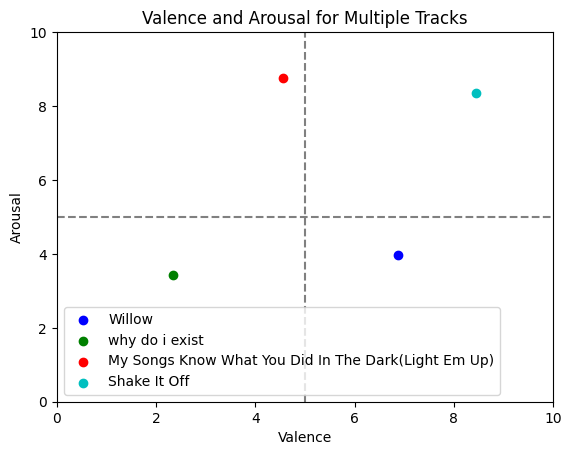

In [8]:
import matplotlib.pyplot as plt
import mplcursors

def plot_valence_arousal(track_names, valence_values, arousal_values):
    """Plot the valence and arousal for a list of tracks."""
    fig, ax = plt.subplots()
    cursor = mplcursors.cursor(ax)
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Add more colors if you have more than 7 songs

    for i, (track_name, valence, arousal) in enumerate(zip(track_names, valence_values, arousal_values)):
        scatter = ax.scatter([valence], [arousal], c=colors[i % len(colors)], label=track_name)

    ax.set_xlim(0, 10)  # Set x-axis limits from 0 to 10 assuming valence and arousal are on a scale of 0 to 10
    ax.set_ylim(0, 10)  # Set y-axis limits from 0 to 10
    ax.axvline(x=5, color='gray', linestyle='--')  # Add a vertical line at x=5
    ax.axhline(y=5, color='gray', linestyle='--')  # Add a horizontal line at y=5
    ax.set_xlabel('Valence')
    ax.set_ylabel('Arousal')
    ax.set_title('Valence and Arousal for Multiple Tracks')
    ax.legend(loc='best')
    plt.show()

# Manually input valence and arousal values for each track
valence_values = [6.878, 2.34, 4.56, 8.456]
arousal_values = [3.97, 3.43, 8.767, 8.34]

track_names = ['Willow', 'why do i exist', 'My Songs Know What You Did In The Dark(Light Em Up)', 'Shake It Off']  
plot_valence_arousal(track_names, valence_values, arousal_values)


## graph for euclidean distances with and without video

In [9]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import mplcursors
import numpy as np

# Set up Spotify API credentials
client_id = '8a9262cf15dd4e16bd72737b6e6a93ee'
client_secret = '1b7eb12115884c8eb165f3291eaa55c6'
redirect_uri = 'https://en.wikipedia.org/wiki/India'

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

def get_track_id(track_name):
    """Get the Spotify track ID for a given track name."""
    results = sp.search(q='track:' + track_name, type='track')
    return results['tracks']['items'][0]['id']

def get_track_features(track_id):
    """Get the valence and arousal (danceability) for a given track ID."""
    features = sp.audio_features([track_id])
    valence = features[0]['valence']
    arousal = features[0]['danceability']
    return {'valence': valence, 'arousal': arousal}

def get_tracks_data(track_names):
    """Get valence and arousal data for a list of tracks."""
    tracks_data = {}
    for track_name in track_names:
        track_id = get_track_id(track_name)
        track_features = get_track_features(track_id)
        tracks_data[track_name] = track_features
    return tracks_data

track_names = ['Willow', 'Zevia', 'Fall Out Boy', 'Shake it Off']  # Replace with your list of song names
tracks_data = get_tracks_data(track_names)
print(tracks_data)


{'Willow': {'valence': 0.529, 'arousal': 0.392}, 'Zevia': {'valence': 0.372, 'arousal': 0.91}, 'Fall Out Boy': {'valence': 0.282, 'arousal': 0.547}, 'Shake it Off': {'valence': 0.943, 'arousal': 0.647}}


In [10]:
track_data = {
    'Willow': {'valence': 6.878, 'arousal': 3.97},
    'why do i exist': {'valence': 2.34, 'arousal': 3.43},
    'My Songs Know What You Did In The Dark(Light Em Up)': {'valence': 4.56, 'arousal': 8.767},
    'Shake It Off': {'valence': 8.456, 'arousal': 8.34}
}


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error


# Assuming you have a CSV file named 'responses.csv'
df = pd.read_csv('combined_file.csv')
df['video'] = df.iloc[:, 15]
df['Valence_value']=df.iloc[:, 11]
df['Arousal_value']=df.iloc[:, 12]

In [14]:
# Keep only the desired columns
df = df[['Song', 'Valence_value', 'Arousal_value', 'video']]
df = df.dropna(subset=['video'])

print(df)

            Song  Valence_value  Arousal_value video
0         Willow              7              5    No
1          Zevia              3              2    No
2   Fall Out Boy              9              9    No
3   Shake it Off              6              8    No
4         Willow              7              7    No
5         Willow              8              9   Yes
6          Zevia              3              1   Yes
7   Fall Out Boy              7             10   Yes
8   Shake it Off              6              7   Yes
9         Willow              9              4   Yes
10        Willow              8              3   Yes
11         Zevia              3              3   Yes
12  Fall Out Boy              2              7   Yes
13  Shake it Off             10              9   Yes
14        Willow              4              7   Yes
15        Willow              9              9    No
16         Zevia              3              3    No
17  Fall Out Boy              6              8

In [15]:
df_willow_yes = df[(df['Song'] == 'Willow') & (df['video'] == 'Yes')]
df_willow_no = df[(df['Song'] == 'Willow') & (df['video'] == 'No')]
euclidean_distances_yes = []
euclidean_distances_no = []
for index, row in df_willow_yes.iterrows():
    x = row['Valence_value']
    y = row['Arousal_value']
    x0 = tracks_data['Willow']['valence']
    y0 = tracks_data['Willow']['arousal']
    euclidean_distance = np.sqrt((x - x0)**2 + (y - y0)**2)
    euclidean_distances_yes.append(euclidean_distance)

# Calculate Euclidean distance for 'no' video
for index, row in df_willow_no.iterrows():
    x = row['Valence_value']
    y = row['Arousal_value']
    x0 = tracks_data['Willow']['valence']
    y0 = tracks_data['Willow']['arousal']
    euclidean_distance = np.sqrt((x - x0)**2 + (y - y0)**2)
    euclidean_distances_no.append(euclidean_distance)

print("Euclidean distances for 'willow' with video 'yes':", euclidean_distances_yes)
print("Euclidean distances for 'willow' with video 'no':", euclidean_distances_no)

Euclidean distances for 'willow' with video 'yes': [11.397960563188487, 9.20736145700819, 7.913122329396911, 7.464147975489231, 5.797715498366576, 9.341600772886839, 7.464147975489231, 8.2965959887173]
Euclidean distances for 'willow' with video 'no': [7.944023225041578, 9.248756943503272, 12.077065247815796, 5.745215835806345]


In [16]:
euclidean_distances = {}

# Iterate over each unique song
for song in df['Song'].unique():
    # Filter the DataFrame for the current song and videos labeled as 'Yes' and 'No'
    df_song_yes = df[(df['Song'] == song) & (df['video'] == 'Yes')]
    df_song_no = df[(df['Song'] == song) & (df['video'] == 'No')]
    
    # Initialize arrays to store Euclidean distances for the current song
    euclidean_distances_yes = []
    euclidean_distances_no = []
    
    # Calculate Euclidean distance for 'Yes' video
    for index, row in df_song_yes.iterrows():
        x = row['Valence_value']
        y = row['Arousal_value']
        x0 = tracks_data[song]['valence']
        y0 = tracks_data[song]['arousal']
        euclidean_distance = np.sqrt((x - x0)**2 + (y - y0)**2)
        euclidean_distances_yes.append(euclidean_distance)
    
    # Calculate Euclidean distance for 'No' video
    for index, row in df_song_no.iterrows():
        x = row['Valence_value']
        y = row['Arousal_value']
        x0 = tracks_data[song]['valence']
        y0 = tracks_data[song]['arousal']
        euclidean_distance = np.sqrt((x - x0)**2 + (y - y0)**2)
        euclidean_distances_no.append(euclidean_distance)
    
    # Store Euclidean distances in the dictionary
    euclidean_distances[song] = {'yes': euclidean_distances_yes, 'no': euclidean_distances_no}

# Print Euclidean distances for each song
for song, distances in euclidean_distances.items():
    print(f"Euclidean distances for '{song}' with video 'Yes':", distances['yes'])
    print(f"Euclidean distances for '{song}' with video 'No':", distances['no'])

Euclidean distances for 'Willow' with video 'Yes': [11.397960563188487, 9.20736145700819, 7.913122329396911, 7.464147975489231, 5.797715498366576, 9.341600772886839, 7.464147975489231, 8.2965959887173]
Euclidean distances for 'Willow' with video 'No': [7.944023225041578, 9.248756943503272, 12.077065247815796, 5.745215835806345]
Euclidean distances for 'Zevia' with video 'Yes': [2.6295406442951212, 3.3577498417839293, 1.630485817172293, 3.3577498417839293]
Euclidean distances for 'Zevia' with video 'No': [2.8450806666947077, 3.3577498417839293]
Euclidean distances for 'Fall Out Boy' with video 'Yes': [11.597013969121534, 6.677779046958652, 9.234540215950114, 7.002052056361763]
Euclidean distances for 'Fall Out Boy' with video 'No': [12.143176396643508, 9.393760322682287]
Euclidean distances for 'Shake it Off' with video 'Yes': [8.119966625547177, 12.320789666251105, 11.666012943589598, 11.605509812153882]
Euclidean distances for 'Shake it Off' with video 'No': [8.924116650963276, 10.934

In [17]:
import numpy as np
import pandas as pd

euclidean_distances = {}

# Iterate over each unique song
for song in df['Song'].unique():
    # Filter the DataFrame for the current song and videos labeled as 'Yes' and 'No'
    df_song_yes = df[(df['Song'] == song) & (df['video'] == 'Yes')]
    df_song_no = df[(df['Song'] == song) & (df['video'] == 'No')]
    
    # Initialize arrays to store Euclidean distances for the current song
    euclidean_distances_yes = []
    euclidean_distances_no = []
    
    # Calculate Euclidean distance for 'Yes' video
    for index, row in df_song_yes.iterrows():
        x = row['Valence_value']
        y = row['Arousal_value']
        x0 = tracks_data[song]['valence']
        y0 = tracks_data[song]['arousal']
        euclidean_distance = np.sqrt((x - x0)**2 + (y - y0)**2)
        euclidean_distances_yes.append(euclidean_distance)
    
    # Calculate Euclidean distance for 'No' video
    for index, row in df_song_no.iterrows():
        x = row['Valence_value']
        y = row['Arousal_value']
        x0 = tracks_data[song]['valence']
        y0 = tracks_data[song]['arousal']
        euclidean_distance = np.sqrt((x - x0)**2 + (y - y0)**2)
        euclidean_distances_no.append(euclidean_distance)
    
    # Take the average of Euclidean distances for each song
    avg_distance_yes = np.mean(euclidean_distances_yes)
    avg_distance_no = np.mean(euclidean_distances_no)
    
    # Store average Euclidean distances in the dictionary
    euclidean_distances[song] = {'yes': avg_distance_yes, 'no': avg_distance_no}

# Print average Euclidean distances for each song
for song, distances in euclidean_distances.items():
    print(f"Average Euclidean distance for '{song}' with video 'Yes':", distances['yes'])
    print(f"Average Euclidean distance for '{song}' with video 'No':", distances['no'])


Average Euclidean distance for 'Willow' with video 'Yes': 8.360331570067846
Average Euclidean distance for 'Willow' with video 'No': 8.753765313041747
Average Euclidean distance for 'Zevia' with video 'Yes': 2.7438815362588183
Average Euclidean distance for 'Zevia' with video 'No': 3.1014152542393187
Average Euclidean distance for 'Fall Out Boy' with video 'Yes': 8.627846322098016
Average Euclidean distance for 'Fall Out Boy' with video 'No': 10.768468359662897
Average Euclidean distance for 'Shake it Off' with video 'Yes': 10.92806976188544
Average Euclidean distance for 'Shake it Off' with video 'No': 9.929549934985946


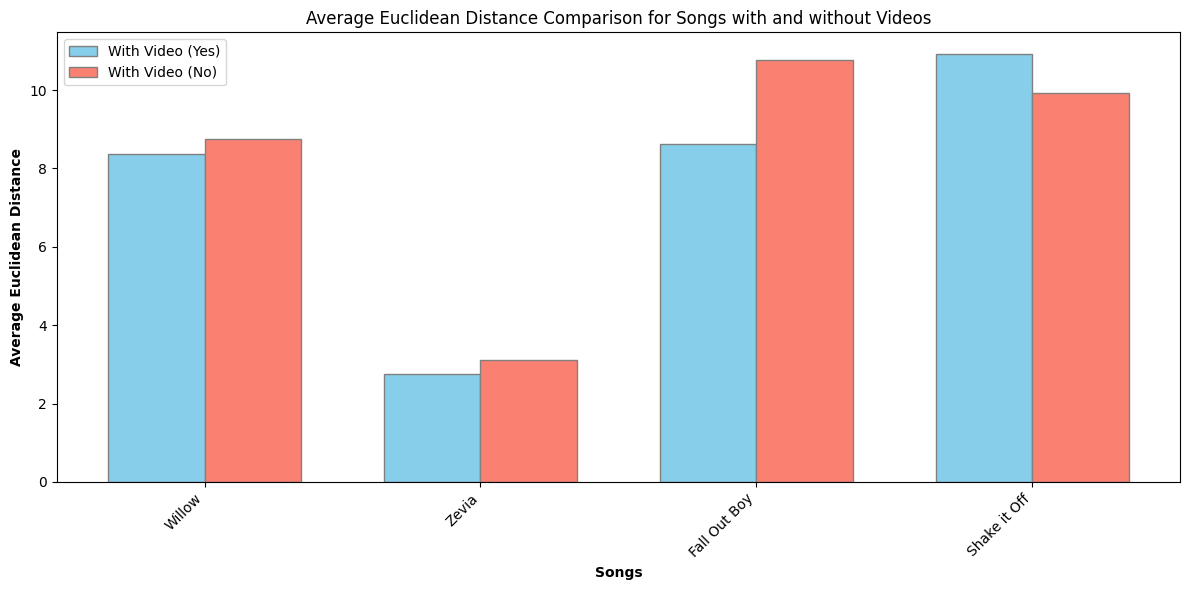

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Extract song names and average distances for songs with and without videos
songs = list(euclidean_distances.keys())
avg_distances_yes = [distances['yes'] for distances in euclidean_distances.values()]
avg_distances_no = [distances['no'] for distances in euclidean_distances.values()]

# Set the width of the bars
bar_width = 0.35

# Set position of bar on X axis
r1 = np.arange(len(songs))
r2 = [x + bar_width for x in r1]

# Create side-by-side bar chart
plt.figure(figsize=(12, 6))
plt.bar(r1, avg_distances_yes, color='skyblue', width=bar_width, edgecolor='grey', label='With Video (Yes)')
plt.bar(r2, avg_distances_no, color='salmon', width=bar_width, edgecolor='grey', label='With Video (No)')

# Add xticks on the middle of the group bars
plt.xlabel('Songs', fontweight='bold')
plt.ylabel('Average Euclidean Distance', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(songs))], songs, rotation=45, ha='right')

# Create legend & Show graphic
plt.legend()
plt.title('Average Euclidean Distance Comparison for Songs with and without Videos')

# Show plot
plt.tight_layout()
plt.show()
